In [1]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
import sklearn.linear_model as sk
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.model_selection import train_test_split
from collections import defaultdict
from sklearn.svm import SVC
import warnings
warnings.filterwarnings('ignore')

In [2]:
data = pd.read_csv("haberman.data",header=None)
data_df = pd.DataFrame(data)
data_df.dropna(inplace=True)

In [3]:
data_df.columns = ['Age','Year','Nodes','Survival_status']
data_df.head(7)
# data_df['Survival_status'] = data_df['Survival_status'].astype(int)


,Age,Year,Nodes,Survival_status
0,30,64,1,1
1,30,62,3,1
2,30,65,0,1
3,31,59,2,1
4,31,65,4,1
5,33,58,10,1
6,33,60,0,1


In [4]:
data_df['Survival_status'] = data_df['Survival_status'].astype(int)

In [5]:
data_df['Survival_status'] = data_df['Survival_status'].map({2:0 , 1:1})
print(len(data_df.loc[data_df['Survival_status']==1]),len(data_df.loc[data_df['Survival_status']==0]))

225 81


# Classifier: 


1). LogisticRegression

2). DecisionTree

3). SVM

4). NaiveBayes

5). RandomForest

In [6]:
label = data_df['Survival_status']
features = data_df.loc[:,data_df.columns!='Survival_status']
original_data = data_df.copy(deep=True)

In [7]:
sample = data_df.sample(frac=0.2)
n = len(data_df)

In [8]:
for i in sample.index:
    data_df['Survival_status'][i] = int(not data_df['Survival_status'][i])
print(len(data_df.loc[data_df['Survival_status']==1]),len(data_df.loc[data_df['Survival_status']==0]))

188 118


In [9]:
sc = []
for i in range(0,50):
    #original_data['Survival_status'] != data_df['Survival_status']
    x_train,x_test,y_train,y_test = train_test_split(features,label , test_size=i/100)
    lr = LogisticRegression()

    lr.fit(x_train,y_train)
    sc.append(lr.score(x_train , y_train))

0.29


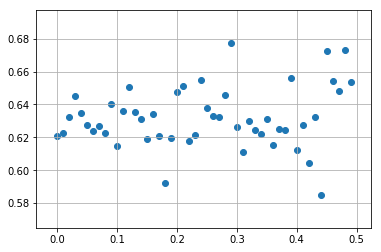

In [10]:
x = [i/100 for i in range(0,50)]
#plt.figure(figsize=(20,20))
plt.scatter(x , sc )
print(x[sc.index(max(sc))])
plt.grid(True)


# LogisticRegression

In [11]:
x_train,x_test,y_train,y_test = train_test_split(features,label , test_size=0.38)  #Max Accuracy

In [12]:
train_size = len(x_train)
predicted = defaultdict(list)

In [13]:
lr = LogisticRegression()
lr.fit(x_train,y_train)
predict = lr.predict(x_train)
for i in range(train_size):
    predicted[i].append(predict[i])

In [14]:
lr.score(x_test,y_test)

0.6153846153846154

# NaiveBayes 

In [15]:
nb = GaussianNB()
nb.fit(x_train,y_train)
predict = nb.predict(x_train)
for i in range(train_size):
    predicted[i].append(predict[i])

In [16]:
nb.score(x_test,y_test)

0.6153846153846154


# DecisionTree

In [17]:
dt = DecisionTreeClassifier(criterion='entropy')
dt.fit(x_train,y_train)
predict = dt.predict(x_train)
for i in range(train_size):
    predicted[i].append(predict[i])

In [18]:
dt.score(x_test,y_test)

0.4700854700854701

# SVM

In [19]:
svm = SVC(gamma=.00001)
svm.fit(x_train,y_train)
predict = svm.predict(x_train)
for i in range(train_size):
    predicted[i].append(predict[i])

In [20]:
svm.score(x_test,y_test)

0.6153846153846154

# RandomForest

In [21]:
rf = RandomForestClassifier(n_estimators=200)
rf.fit(x_train,y_train)
predict = rf.predict(x_train)
for i in range(train_size):
    predicted[i].append(predict[i])

In [22]:
rf.score(x_test,y_test)

0.4700854700854701

In [23]:
predicted_df = pd.DataFrame(predicted)
soft_label = pd.DataFrame([pd.Series([(predicted_df.shape[0] - predicted_df[i].sum())/predicted_df.shape[0], predicted_df[i].sum()/predicted_df.shape[0]])  for i in range(predicted_df.shape[1])])
# print(soft_label)
final_label = [1 if predicted_df[i].sum()>3  else 0 if predicted_df[i].sum()<2 else -1 for i in range(predicted_df.shape[1])]
soft_label.columns = ['Chances of Death','Chances of Survival']
soft_label

,Chances of Death,Chances of Survival
0,0.4,0.6
1,0.4,0.6
2,0.4,0.6
3,0.4,0.6
4,0.0,1.0
5,0.0,1.0
6,0.0,1.0
7,0.4,0.6
8,0.0,1.0
9,0.4,0.6
